In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import RK45, odeint, solve_ivp
from scipy.special import expit
import math
plt.style.use(['science','notebook','grid'])
from scipy.fft import fft, fftfreq, ifft


In [12]:
from tqdm import tqdm
def RK4(dydx, z, y0,Gamma):    
    h = (z[1]-z[0])
    h_list = np.full(shape = len(y0), fill_value = h, dtype = float)
    y = np.zeros([len(z+1), len(y0)],dtype = complex)  
    y[0] = y0

    for iters, z_iters in enumerate(tqdm(z,desc=dydx.__name__)):
        k1 = h_list * dydx(z_iters, y[iters], iters,Gamma)
        k2 = h_list * dydx(z_iters + 0.5 * h, y[iters] + 0.5 * k1, iters,Gamma)
        k3 = h_list * dydx(z_iters + 0.5 * h, y[iters] + 0.5 * k2, iters,Gamma)
        k4 = h_list * dydx(z_iters + h, y[iters] + k3, iters,Gamma)
        
        if iters == len(z)-1:
            break
        y[iters+1] = y[iters] + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
    return y

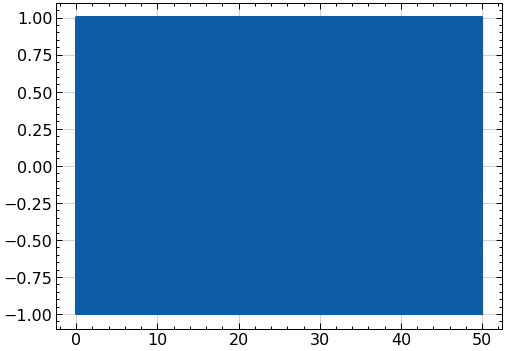

In [13]:
#gamma_inf:
#d=1
zeta_max = 50
iterations = 100000
zeta = np.linspace(0, zeta_max,iterations )

gamma_under = 0.4
gamma_critical = 1
gamma_over = 2

np0_list = np.array([0.9+0.0j,0.999+0.0j,0.99999+0.0j])
ns0_list = np.array([1-np0_list[0]+0.0j,1-np0_list[1]+0.0j,1-np0_list[2]+0.0j])
ni0_list = np.array([0+0.0j,0+0.0j,0+0.0j])
gamma0_under = gamma_under*(2/np0_list)**0.5
gamma0_critical = gamma_critical*(2/np0_list)**0.5
gamma0_over = gamma_over*(2/np0_list)**0.5

delta_OPA = 1200*np.pi; delta_SHG = 1000*np.pi
d_r = 5*np.sin(delta_OPA*zeta)+1*np.sin(delta_SHG*zeta) #1.17, 1.41
d_eff = np.sign(d_r)
plt.plot(zeta,d_eff)
plt.show()

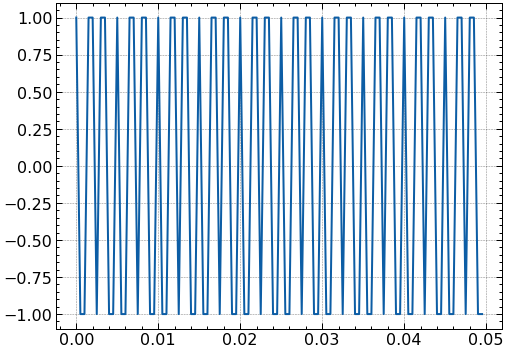

In [14]:
plt.plot(zeta[:100], d_eff[:100])
plt.show()

In [15]:
N = 2*iterations
timestep = zeta_max/N
r1 = fft(d_eff)
n1 = r1.size

freq1 = fftfreq(n1, timestep)*np.pi

r2 = fft(d_r)
n2 = r2.size

freq2 = fftfreq(n2, timestep)*np.pi

b1 = 2*np.pi*np.abs(r1)**2/(N**2)

b2 = 2*np.pi*np.abs(r2)**2/(N**2)

max1 = np.amax(b1[0:])
max2 = np.amax(b1[40001:])
print(max1)
print(max2)
print("Ratio of FFT Squared (OPA/SHG) is "+str(max2/max1)+"... So ratio is "+ str((max2/max1)**0.5))

0.4531818185209385
0.4531818185209385
Ratio of FFT Squared (OPA/SHG) is 1.0... So ratio is 1.0


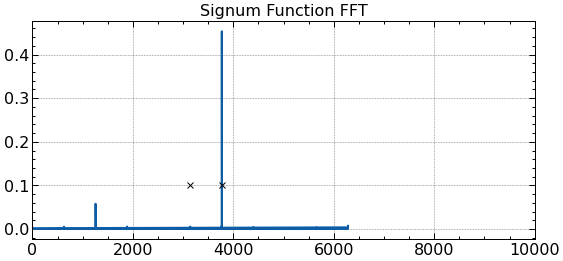

In [16]:
plt.figure(figsize=(9,4))
plt.plot(freq1,b1)
plt.plot(delta_OPA,0.1,'kx') 
plt.plot(delta_SHG,0.1,'kx') 
plt.xlim(0,0.1*10**5)
plt.title('Signum Function FFT')
#plt.savefig('C_values_ControlFFT2.png', bbox_inches='tight')
plt.show()

In [17]:
def dAdz_under1(z,S,iters,Gamma):
    Us, Up, Ui, U2i = S
    return  (d_eff[iters]*1j*Up*np.conj(Ui)*np.exp(1j*delta_OPA*z), 
            d_eff[iters]*1j*Us*Ui*np.exp(-1j*delta_OPA*z), 
            d_eff[iters]*1j*(Up*np.conj(Us)*np.exp(1j*delta_OPA*z)+2*Gamma*U2i*np.conj(Ui)*
            np.exp(1j*delta_SHG*z)), 
            d_eff[iters]*1j*Gamma*Ui**2*np.exp(-1j*delta_SHG*z))


In [18]:
#y_under1 = RK4(dAdz_under1, zeta, [ns0_list[0]**0.5,np0_list[0]**0.5,0+0.0j,0+0.0j],gamma0_under[0])
#y_under2 = RK4(dAdz_under1, zeta, [ns0_list[1]**0.5,np0_list[1]**0.5,0+0.0j,0+0.0j],gamma0_under[1])
#y_under3 = RK4(dAdz_under1, zeta, [ns0_list[2]**0.5,np0_list[2]**0.5,0+0.0j,0+0.0j],gamma0_under[2])
#y_critical1 = RK4(dAdz_under1, zeta, [ns0_list[0]**0.5,np0_list[0]**0.5,0+0.0j,0+0.0j],gamma0_critical[0])
#y_critical2 = RK4(dAdz_under1, zeta, [ns0_list[1]**0.5,np0_list[1]**0.5,0+0.0j,0+0.0j],gamma0_critical[1])
#y_critical3 = RK4(dAdz_under1, zeta, [ns0_list[2]**0.5,np0_list[2]**0.5,0+0.0j,0+0.0j],gamma0_critical[2])
y_over1 = RK4(dAdz_under1, zeta, [ns0_list[0]**0.5,np0_list[0]**0.5,0+0.0j,0+0.0j],gamma0_over[0])
#y_over2 = RK4(dAdz_under1, zeta, [ns0_list[1]**0.5,np0_list[1]**0.5,0+0.0j,0+0.0j],gamma0_over[1])
#y_over3 = RK4(dAdz_under1, zeta, [ns0_list[2]**0.5,np0_list[2]**0.5,0+0.0j,0+0.0j],gamma0_over[2])

dAdz_under1: 100%|█████████▉| 99999/100000 [00:16<00:00, 6225.87it/s]


In [19]:
As_under1 = np.abs(y_over1[:,0])**2
Ap_under1 = np.abs(y_over1[:,1])**2
Ai_under1 = np.abs(y_over1[:,2])**2
A2i_under1 = np.abs(y_over1[:,3])**2
# As_under2 = np.abs(y_critical3[:,0])**2
# Ap_under2 = np.abs(y_critical3[:,1])**2
# Ai_under2 = np.abs(y_critical3[:,2])**2
# A2i_under2= np.abs(y_critical3[:,3])**2
# Ap_under2 = np.abs(y_under2[:,1])**2
# Ap_under3 = np.abs(y_under3[:,1])**2
# Ap_critical1 = np.abs(y_critical1[:,1])**2
# Ap_critical2 = np.abs(y_critical2[:,1])**2
# Ap_critical3 = np.abs(y_critical3[:,1])**2
# Ap_over1 = np.abs(y_over1[:,1])**2
# Ap_over2 = np.abs(y_over2[:,1])**2
# Ap_over3 = np.abs(y_over3[:,1])**2

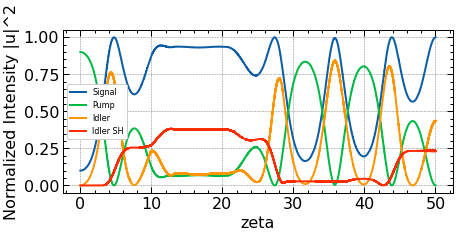

In [20]:
plt.figure(figsize=(7,3))
plt.plot(zeta, As_under1)
plt.plot(zeta, Ap_under1)
plt.plot(zeta, Ai_under1)
plt.plot(zeta, A2i_under1)
plt.legend(['Signal','Pump','Idler','Second Harmonic'])
plt.xlabel("zeta")
plt.ylabel("Normalized Intensity |u|^2")
plt.legend(["Signal", "Pump", "Idler", "Idler SH"],prop={'size': 8})

# ax1 = plt.subplot(321)          
# ax1.plot(zeta,Ap_under1)
# ax1.plot(zeta,Ap_under2)
# ax1.plot(zeta,Ap_under3)
# ax1.set_title('U^2 under')

# ax2 = plt.subplot(322)          
# ax2.plot(zeta,Ap_critical1)
# ax2.plot(zeta,Ap_critical2)
# ax2.plot(zeta,Ap_critical3)
# ax2.set_title('U^2 critical')

# ax3 = plt.subplot(323)          
# ax3.plot(zeta,Ap_over1)
# ax3.plot(zeta,Ap_over2)
# ax3.plot(zeta,Ap_over3)
# ax3.set_title('U^2 over')
#plt.savefig('C_values_Control2.png', bbox_inches='tight')
plt.show()